# Python Classes: Variable attributes and Magic Methods
## Creating a Class with variable number of attributes
### The explicit method: <code>**kwargs</code>

In [1]:
class Agent():
    
    def __init__(self, **kwargs):
        
        default_attr = dict(name = None, designation = None, department = None, unit = None)        # Define default attributes
        additional_attr = ['experience', 'salary', 'skillset']                                      # define (additional) allowed attributes with no default value
        
        allowed_attr = list(default_attr.keys()) + additional_attr
        
        if set(kwargs.keys()).issubset(allowed_attr):
            self.__dict__.update(kwargs)
            
        else:
            unallowed_args = set(kwargs.keys()).difference(allowed_attr)
            raise Exception (f'The following unsupported argument(s) is passed to Agent:\n{unallowed_args}')
            
    def __str__(self):
        return 'The Agent Class.'
    
    def __eq__(self, other_agent):
        return self.__dict__ == other_agent.__dict__
            
# agent = Agent(name = 'Anita', designation = 'Associate', department = 'Business Development', unit = 'Digital')

agent = Agent(name = 'Bimal', designation = 'Developer')
agent.__dict__

{'name': 'Bimal', 'designation': 'Developer'}

### The Class decorator method

In [5]:
import datetime

# class decorator definition
def classattributes(default_attr, additional_attr):
    def class_decorator(cls):
        def new_init(self,*args,**kwargs):
            allowed_attr = list(default_attr.keys()) + additional_attr
            default_attr.update(kwargs)
            self.__dict__.update((k,v) for k,v in default_attr.items() if k in allowed_attr)
        cls.__init__ = new_init
        return cls
    return class_decorator

# usage:
# 1st arg is a dict of attributes with default values
# 2nd arg is a list of additional allowed attributes which may be instantiated or not


# Using class decorator to initialize the class Student()
@classattributes( dict(name=None, standard=True) , ['dob','english','math','science'] )
class Student():
    
    def age(self):                                                                            # add here class body except __init__
        today = datetime.date.today()
        birthdate = datetime.datetime.strptime(self.dob, '%d/%m/%Y')
        age = today.year - birthdate.year

        if today < datetime.date(today.year, birthdate.month, birthdate.day):
            age -= 1

        return age
    
    def scorecard(self):
        
        result = {
        'English': self.english,
        'Math'   : self.math,
        'Science': self.science
        }
        
        return result

john = {'name':'John Doe', 'standard':8}

student = Student(john, dob = '1/1/1990', english = 80, math = 90, science = 85)
print(student.age())
print(student.scorecard())
print()

# Using class decorator to initialize the class Employee()
@classattributes( dict(name = None, designation = None, department = None, experience = None), ['statistics','visualization', 'python', 'r'] )
class Employee():
    
    def __eq__(self, other_employee):
        return self.__dict__ == other_employee.__dict__
    
    def details(self):
        
        result = {
        'name': self.name,
        'designation'   : self.designation,
        'department': self.department
        }
        
        for k in result:
            print(f'{k}: {result[k]}')
        
        return result
    
emp1 = Employee(name = 'Amit', designation = 'Analyst', department = 'Data Analytics', experience = 4)
print(emp1.designation)
print(emp1.details())

emp2 = Employee(name = 'Amita', designation = 'Analyst', department = 'Data Analytics', experience = 4)
print(emp1.__eq__(emp2))

32
{'English': 80, 'Math': 90, 'Science': 85}

Analyst
name: Amit
designation: Analyst
department: Data Analytics
{'name': 'Amit', 'designation': 'Analyst', 'department': 'Data Analytics'}
False


In [3]:
print(3.3 + 4.4)
print(3.3.__add__(4.4))

print(len([1, 2, 3]))
print([1, 2, 3].__len__())

print("h" in "hello")
print("hello".__contains__("h"))

print(["a", "b", "c"][2])
print(["a", "b", "c"].__getitem__(2))

7.7
7.7
3
3
True
True
c
c


## Creating a Class with named tuples
* Named tuple: A named tuple is a special tuple that allows access to its values either by position or keyword / name.
* Named tuples are used to create new simple classes which contain attributes, but no instance methods. Typically these simple classes are used to store data.

In [4]:
import collections

fields = ['name', 'category', 'price']
Product = collections.namedtuple('Product', fields, defaults = (None,)*len(fields))

print(Product())

watch = Product(name = 'Watch', category='Sports', price=19.99)
print(watch[2])
print(watch.price)

Product(name=None, category=None, price=None)
19.99
19.99


In [5]:
from dataclasses import dataclass
from typing import Any

@dataclass
class Node:
    val: Any = None 
    left: 'Node' = None 
    right: 'Node' = None 
        
Node()

Node(val=None, left=None, right=None)

# Python Classes: Magic Methods
## Magic Methods
 * Gives the option to customize complexities of classes
 * Use Magic Methods to make custom classes behave like python's built in classes.
 * dunder methods works as hooks for our classes.
 * <b>Hook:</b> A 'hook' is a procedure that intercepts a process at some point in its execution

### The <code>__str__()</code> and <code>__repr__()</code> methods
 * <b>Operator Overloading:</b> Custom objects designed to respond to familiar python operations (indexing, slicing, adding, printing, checking for equality).

In [6]:
class Card():
    
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank
        
    def __str__(self):                                # Magic -> Instance method
        return f'{self.rank} of {self.suit}'          # Executes when the object is printed
    
    def __repr__(self):
        return f'Card("{self.suit}", "{self.rank}")'  # More technical representation of the object
                                                      # How it can be created from scratch.
        
c = Card('Spades', 'Ace')
print(c)
print(repr(c))
print(f'''
{c.__str__()},
{c.__repr__()}
''')

Ace of Spades
Card("Spades", "Ace")

Ace of Spades,
Card("Spades", "Ace")



### The <code>__eq__()</code> magic method

In [7]:
# Equality of dictionaries
x = dict(a = 1, b = 2, c = 3)
y = dict(a = 1, c = 3, b = 2)
x == y

True

In [8]:
# !pip install shapely

### Creating a polar plot

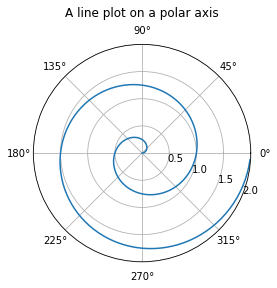

In [9]:
import numpy as np
import matplotlib.pyplot as plt


r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

### The Magic Methods for comparison operators: The <code>__gt__()</code> method
### Exercise: Comparing areas of regular polygons

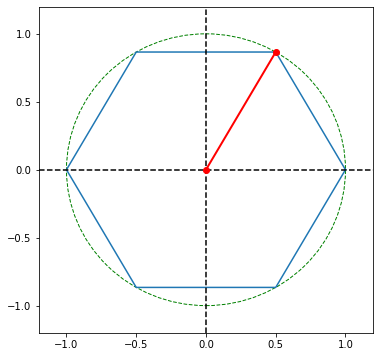

Area of hexagon: 2.5981

Area of pentagon: 2.3776
True
False


In [10]:
import math
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

class RegularPolygon():
    
    '''
    A class that generates regular polygons of circumradius 1 unit.
    Enter number of sides to generate the polygon.
    
    Attributes
    ----------------
    n: int
            Defines the number of sides, mandatory, default = 6
    '''
    def __init__(self, n = 6):
        self.n = n
        
    @property
    def coordinates(self):
        '''
        Generate the list of coordinates from the number of sides. returns a list of coordinates (tuples).
        '''
        return [(math.cos(2*math.pi *i/self.n), math.sin(2*math.pi *i/self.n)) for i in range(self.n)]
    
    @property
    def side_length(self):
        '''
        Calcualates side length by applying Euclidean distance formula between 2 adjacent coordinates.
        '''
        return math.sqrt((self.coordinates[0][0] - self.coordinates[1][0])**2 + (self.coordinates[0][1] - self.coordinates[1][1])**2)
    
    @property
    def area(self):
        '''
        Calculates area of polygon from number of sides.
        '''
        polygon_area = round(((self.side_length)**2)*(self.n)/(4*math.tan(math.pi /self.n)), 4)
        return polygon_area
    
    def draw(self):
        '''
        Draws the polygon and its circum-circle.
        '''
        
        polygon = Polygon(self.coordinates)
        x,y = polygon.exterior.xy
        
        fig, ax = plt.subplots(figsize = (6, 6))
#         ax.set_aspect( 1 )
        
        plt.plot(x,y)
        plt.axvline(x=0, c="black", ls = '--', label="x=0")
        plt.axhline(y=0, c="black", ls = '--', label="y=0")
        
        Drawing_uncolored_circle = plt.Circle((0, 0), 1, fill = False, color="green", ls='--')
        plt.plot([0, self.coordinates[1][0]], [0, self.coordinates[1][1]], color='r', linestyle='-', linewidth=2)
        plt.plot(0,0, 'ro')
        plt.plot(self.coordinates[1][0],self.coordinates[1][1], 'ro')
        ax.add_artist(Drawing_uncolored_circle)
        ax.set_xlim([-1.2, 1.2])
        ax.set_ylim([-1.2, 1.2])
        
        plt.show()
        
    def __gt__(self, other):
        return self.area > other.area
    
    def __lt__(self, other):
        return self.area < other.area
        
hexagon = RegularPolygon(6)
hexagon.draw()
print(f'Area of hexagon: {hexagon.area}', end ='\n\n')

pentagon = RegularPolygon(5)
octagon = RegularPolygon(8)
print(f'Area of pentagon: {pentagon.area}')
print(hexagon.__gt__(pentagon))
print(octagon.__lt__(pentagon))

### Docstrings
* <b>Docstrings:</b> A regular python string that creates techncial documentation for a piece of program (function or Class or module).

In [11]:
import sys  
sys.path.append('C:/Code/Concepts/C01 - Python/M02 - Python - Class')
import polygon
help(polygon.RegularPolygon)

Help on class RegularPolygon in module polygon:

class RegularPolygon(builtins.object)
 |  RegularPolygon(n=6)
 |  
 |  A class that generates regular polygons of circumradius 1 unit.
 |  Enter number of sides to generate the polygon.
 |  
 |  Attributes
 |  ----------------
 |  n: int
 |          Defines the number of sides, mandatory, default = 6
 |  
 |  Methods defined here:
 |  
 |  __gt__(self, other)
 |      Return self>value.
 |  
 |  __init__(self, n=6)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __lt__(self, other)
 |      Return self<value.
 |  
 |  draw(self)
 |      Draws the polygon and its circum-circle.
 |  
 |  ----------------------------------------------------------------------
 |  Readonly properties defined here:
 |  
 |  area
 |      Calculates area of polygon from number of sides.
 |  
 |  coordinates
 |      Generate the list of coordinates from the number of sides. returns a list of coordinates (tuples).
 |  
 |  side_length

### The <code>__bool__()</code> method

In [13]:
class Employee():
    
    def __init__(self, name, status = 1):
        self.name = name
        self.status = status
        
    def __bool__(self):
        return self.status == 1
    
emp = Employee('Amol', status = 0)

if emp:
    print(f'{emp.name} is active.')
else:    
    print(f'{emp.name} is inactive.')

Amol is inactive.


### The <code>__len__()</code> method

In [14]:
import collections

Book = collections.namedtuple('Book', ['title', 'author'])
great_expectations = Book('Great Expectations', 'Charles Dickens')
pride_and_prejudice = Book('Pride and Prejudice', 'Jane Austin')

class Library():
    
    def __init__(self, *books):
        self.books = books
        
    def __len__(self):
        return len(self.books)
    
library1 = Library(great_expectations)
library2 = Library(great_expectations, pride_and_prejudice)
len(library2.books)
len(library2)

2

### Indexing: The <code>__getitem__()</code> and <code>__setitem__()</code> methods

In [15]:
class Activity():
    
    def __init__(self, name, duration):
        self.name = name
        self.duration = duration
        
class ActivityList():
    
    def __init__(self):
        self.activity_list = []
        
    def add(self, activity_name):
        self.activity_list.append(activity_name)
        
    def __getitem__(self, index):
        return self.activity_list[index]
    
    def __setitem__(self, index, value):
        self.activity_list[index] = value

    
act1 = Activity('Act1', 15)
act2 = Activity('Act2', 15)
act3 = Activity('Act3', 15)
act4 = Activity('Act4', 15)

activity_list = ActivityList()
activity_list.add(act1.name)
activity_list.add(act2.name)

for a in activity_list:
    print(a)

print()
activity_list[1] = act3.name

for a in activity_list:
    print(a)

Act1
Act2

Act1
Act3


### The <code>__del__()</code> method

In [16]:
import time

class Garbage():
    def __del__(self):
        print('Object deleted.')
        
g = Garbage()

g = [1, 2, 3]

time.sleep(5)

print('Program done.')

Object deleted.
Program done.
